In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-5.87161736,  3.6345388 ],
       [-1.65092767,  2.80136423],
       [ 0.76782015,  2.33620834],
       ...,
       [-6.06226626,  2.64313795],
       [-3.66995994,  2.30090536],
       [-1.73076695,  2.80214257]], shape=(1000, 2))

In [6]:
y

array([0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0,

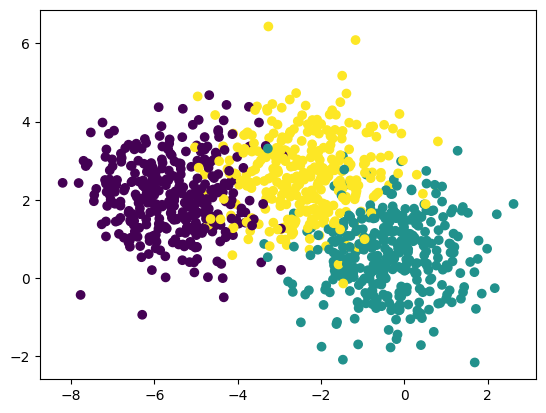

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1340.0,
 681.4345503642114,
 421.67589018936104,
 339.3404679110897,
 272.1441085040507,
 227.4480054522475,
 200.7535604996162,
 188.13025017728322,
 164.2123934310482,
 147.32553799847193]

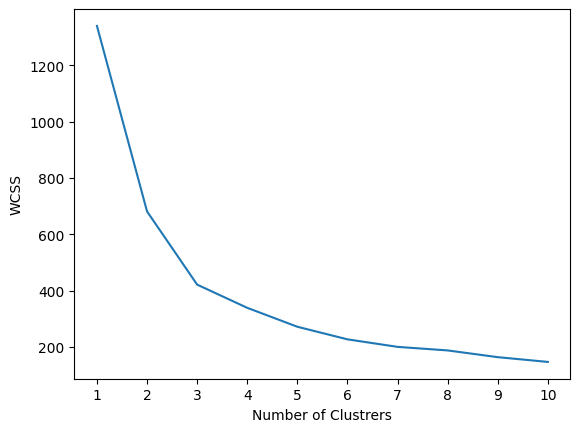

In [17]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2,
       0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0,
       1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0,
       1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1,

In [20]:
y_pred=kmeans.predict(X_test_scaled)

In [21]:
y_pred

array([1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0,

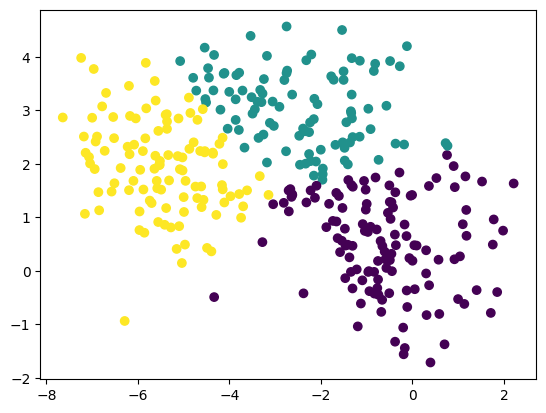

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
## kneelocator
!pip install kneed

In [24]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [27]:
kl.elbow

np.int64(3)

In [28]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[np.float64(0.435007354529063),
 np.float64(0.44991630613581335),
 np.float64(0.4082649749708492),
 np.float64(0.362017836164377),
 np.float64(0.35574955150718857),
 np.float64(0.35258214157375245),
 np.float64(0.35655532531610906),
 np.float64(0.34370940850500925),
 np.float64(0.3464789605726202)]

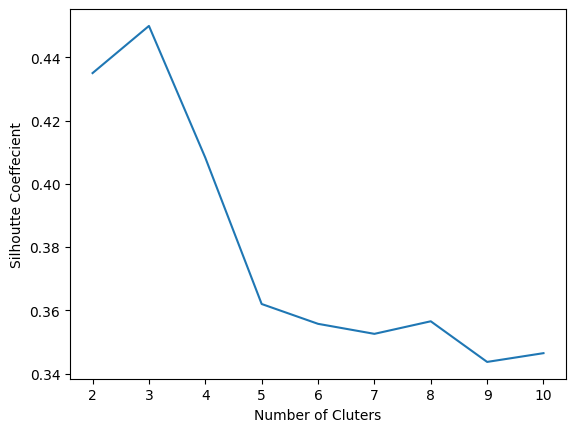

In [32]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()